### Explanation
This code analyse time lapse images of plates with growing colonies and get colony valuable data like size and mean fluorescence over time.

##### Requirements
 - All images have to be same size


## Analysis

### Loading packages

In [1]:
# import some useful packages to manage the data

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#we use scikit-image to analyse the images
import skimage 
from skimage import io, filters

### Loading Data

Define the folder name where the images are stored

In [22]:
#note: all the folder used here are ablable in this drive --> https://goo.gl/Trg1DX 

fname =  "D:\Dropbox\FTI\Raspiscope\Time lapse\Lab_27_1_17_pLac\image_%04d.jpg"
#refered to drive folder Lab_27_1_17_pLac


print(fname%(0))   # just to see if names are well defined

D:\Dropbox\FTI\Raspiscope\Time lapse\Lab_27_1_17_pLac\image_0000.jpg


#### Understanding and visualizing the Data

We use PyPlot to read the file into a numpy array (*imread*). This is a 3-dimensional array (a grid of values) with dimensions x,y,c, with (x,y) position and c the color channel (red, green, blue). 

<img src="files/imagearray.png" width=256 height=256>

We can use PyPlot again to display the array (*imshow*), which interprets the array as a color image correctly.

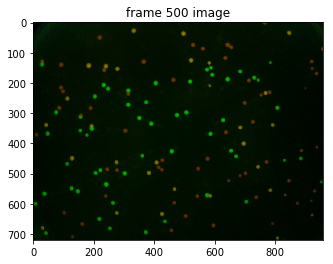

In [35]:
#let's try this with the frame 500 image 

plt.figure()
im1 = plt.imread(fname%500)
plt.imshow(im1)
plt.title('frame '+str(500)+' image')


Or we can show channels separately 

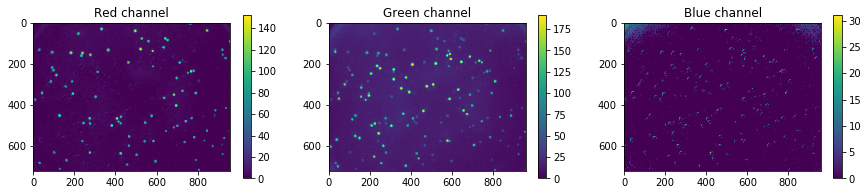

In [37]:
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(im1[:,:,0])
plt.colorbar()
plt.title('Red channel')

plt.subplot(132)
plt.imshow(im1[:,:,1])
plt.colorbar()
plt.title('Green channel')

plt.subplot(133)
plt.imshow(im1[:,:,2])
plt.colorbar()
plt.title('Blue channel')

Each pixel of each channel can take a value between 0 to 255, which value is indicated accord the colorbar at the side of each plot.


---
#### Taking some data measures
Then, we are interested in get the **size of the image** 

We can get it from the numpy array shape 

The 3rd dimension size is 3 for R,G,B --> We dont need it, so use the "_" variable.

In [5]:
w,h,_ = im1.shape
print('w= '+str(w),'  h= '+str(h))

w= 720   h= 960


#### Loading the time series images
There are 3 channels in each image (R,G,B). 
We will load each channel of all the images into a 3-dimensional array, with dimensions x, y, time. 

<img src="files/timeseriesarray.png" width=256 height=256>

-----
As every image is a timepoint value, we should count the total number of images we have in the folder to know the total timepoints

In [58]:
#define a function to count the images on the folder and import the "glob" library used to do that
import glob
def count_files(path,filetype):
    #inputs: path and filetype (e.g. tif, png, jpg)
    #output: number of defined filetype files on the path folder (integer)
    
    imageCount = len(glob.glob1(path,"*."+filetype))
    print(path.split('\\')[-1]+' = '+str(imageCount) + ' files')
    return(imageCount)

In [61]:
imCount=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\Lab_27_1_17_pLac',"jpg")

Lab_27_1_17_pLac = 600 files


Also, set the function to read images and save his values on the 3-dimensional array (for each channel)

In [9]:
def get_im_data(xframes,imageCount,fname):
 #inputs:
  #xframes = step frames (e.g. 10 to use only ten to ten images)
  #imageCount = total number of files
  #fname = folder name
  
 #outputs:
   #imsR,imsG,imsB: data per channel of each image (imsR=matrix size (w,h,imagecount/xframes))

    w,h,_ = plt.imread(fname%1).shape      #measure the image size based on the first image on the folder
    nt = int(imageCount/xframes)
    imsR = np.zeros((w,h,nt))
    imsG = np.zeros((w,h,nt))
    imsB = np.zeros((w,h,nt))
    for i in range(0,nt):
        im = plt.imread(fname%(i*xframes))
        imsR[:,:,i] = im[:,:,0]              #last number code the channel: 0=red, 1=green, 2=blue
        imsG[:,:,i] = im[:,:,1]
        imsB[:,:,i] = im[:,:,2]
    return(imsR,imsG,imsB)

# when call you can take only the channels you are interested in (e.g.):
# red,_,blue=get_im_data(xframes,imageCount)  ---> this only takes the red and blue channels

Now we can use this function to read and store the data of the images on a defined array for each channel

In [62]:
DataS={}
DataS['R'],DataS['G'],DataS['B']=get_im_data(10,imCount,fname) 

Finally is important know the time step value used on the timelapse. It can be know from the python timelapse code stored on the folder (named 'interval' on the code).

In [65]:
#define ot on hour units
dT= 1/12  #hours

#in this example interval = 5 min
